In [70]:
%run src/ZooAnimals.ipynb

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.metrics import silhouette_score
from collections import Counter

In [24]:
#### Addressing the warning for Windows Memory Leak in using K-Means
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [8]:
# Addressing the INput File Path and Importing the data using the DataProcessor Class.
file_path = r"C:\Users\Akash Mittal\Documents\Zoo_Lab\zoo.xlsx" #File Path of the Input File with Features of Animals

animal_data = DataProcessor(file_path)

animal_data.import_data() # Imporitng Data

# print(animal_data.data) #Snapshot of Input Data

File Read OK.


In [12]:
X = animal_data.data.drop(['class_type'], axis=1) # Dropping the Class_type column

Y = animal_data.data['class_type'] # Target Column for Animal Class 

#Segregating only Numeric Data for Analysis
X_numeric = X.drop(['animal_name'], axis=1)

# animal_data.create_pair_plot() # Creating a PairWise ScatterPlot for the Different Animal Features {Commented Out as it Takes more time to Plot that much graphs}

8


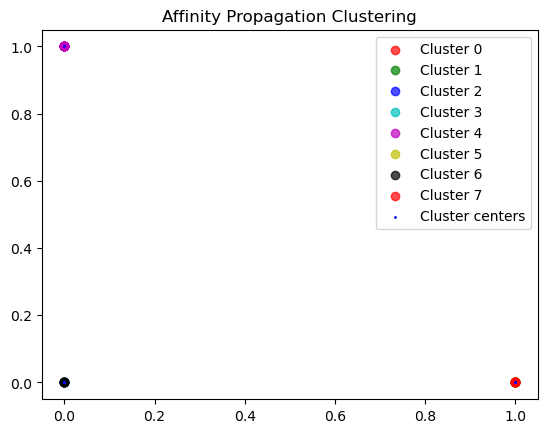

Cluster 0: 19 data points
Cluster 1: 15 data points
Cluster 2: 13 data points
Cluster 3: 6 data points
Cluster 4: 20 data points
Cluster 5: 17 data points
Cluster 6: 4 data points
Cluster 7: 7 data points


"\nanimal_info = animal_data.data[['animal_name', 'class_type']].copy()\nanimal_info['cluster_label'] = labels\n#pd.set_option('display.max_rows', None)\nprint(animal_info)\n"

In [46]:
# Using AffinityPropagation to Cluster the Data Points

#Creating Affinity Object; the damping factor can be between [0.5, 1), preference for exemplars is set None, no preference to any point.
af = AffinityPropagation(damping = 0.7, preference = None)

# Fitting of the Affinity Propagation algorithm
af.fit(X_numeric)

#Get the Cluster Centers
cluster_centers = af.cluster_centers_

#Get labels for each data point
af_labels = af.labels_

# Number of Clusters
n_clusters = len(cluster_centers)
print(n_clusters)

# plotting the clusters

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

for i in range(n_clusters):
    plt.scatter(X_numeric.values[af_labels == i, 0], X_numeric.values[af_labels == i, 1], c=colors[i % len(colors)], alpha=0.70, label='Cluster {}'.format(i))

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=1, color='blue', label='Cluster centers')
plt.title('Affinity Propagation Clustering')
plt.legend()
plt.show()

#Labelling the Clusters
unique_af_labels = np.unique(af_labels)
for label in unique_af_labels:
    cluster_size = np.sum(af_labels == label)
    print(f"Cluster {label}: {cluster_size} data points")

# Comparison of Group from Initial Actual Set to Cluster made by Affinity Propagation
# The difference in actual set and the outputs is not part of the project yet, However I will compare the results of the two ML classifiers used, Affinity Propagation and K-Means.
"""
animal_info = animal_data.data[['animal_name', 'class_type']].copy()
animal_info['cluster_label'] = labels
#pd.set_option('display.max_rows', None)
print(animal_info)
"""


In [52]:
# Applying K-Means Algorithm 

# Selecting Features to use for K-Means Clustering
# But we already calculate it in X_numeric, so using that
# X_numeric has data without animal_name and class_type
# Further, Y has the class_type field stored in it.

# A short review of what is stored in X_numeric and Y
#print(X_numeric,Y)

# Initializing the KMeans with n_init=10, to avoid warning for change in values of Kmeans algorithm in later release of ski-kit learn.
# Specified number of Clusters as 7, as we know there are 7 clusters.

kmeans = KMeans(n_clusters=7, random_state=30, n_init=10)

animal_kmean_labels = kmeans.fit_predict(X_numeric)

animal_kmeans_silhouette = silhouette_score(X_numeric, animal_kmean_labels)

# Pairwise distances between the points for KMeans algo.

pair_wise_distance = np.linalg.norm(X_numeric.values[:, np.newaxis, :] - X_numeric.values, axis=2)

# A generic plot of PairWise Distances, not used for comparison with Affinity Propagation yet. 
# plt.imshow(pair_wise_distance, cmap='cividis', interpolation='none')

# Fitting the K-Means algorithm
kmeans.fit(X_numeric)

kmeans_labels = kmeans.labels_


# Printing the clusters and the number of elements in each cluster

cluster_counter = Counter(kmeans_labels).items()
sorted_cluster = sorted(cluster_counter)
for cluster, count in sorted_cluster:
    print(f"Cluster {cluster}: {count} data points")

C:\Users\Akash Mittal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Akash Mittal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster 0: 8 data points
Cluster 1: 19 data points
Cluster 2: 20 data points
Cluster 3: 4 data points
Cluster 4: 12 data points
Cluster 5: 31 data points
Cluster 6: 7 data points


In [53]:
# Calculating Silhoutte Score For the Affinity Proparation Algorithm and K-Means Algorithm

In [60]:
silhouette_AFP = silhouette_score(X_numeric, af_labels)
# print(f"Silhouette Score Affinity Propagation: {silhouette_AFP}")

silhouette_Kmeans = silhouette_score(X_numeric, kmeans_labels)
# print(f"Silhouette Score K-Means algorithm: {silhouette_Kmeans}")


In [61]:
# Comparison of The Two Algorithms using a custome function, rank_algos_sil
# For n number of algorithms, we can pass a dctionary and then sort the dictionary for scores and then print the algorithm with best score.

In [73]:
def rank_algos_sil(silhouette_AFP, silhouette_Kmeans):
    print(f"K-Means Silhouette Score: {silhouette_Kmeans}")
    print(f"Affinity Propagation Silhouette Score: {silhouette_AFP}")
    
    if silhouette_Kmeans > silhouette_AFP:
        print("K-Means performed better.")
    elif silhouette_Kmeans < silhouette_AFP:
        print("Affinity Propagation performed better.")
    else:
        print("Both K-Means and Affinity Propagation algorithms performs equally.") 

In [74]:
rank_algos_sil(silhouette_AFP, silhouette_Kmeans)

K-Means Silhouette Score: 0.44540411577815003
Affinity Propagation Silhouette Score: 0.4080231117612951
K-Means performed better.
